In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')

print(df.head())
print(df.info())
print(df.describe())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2

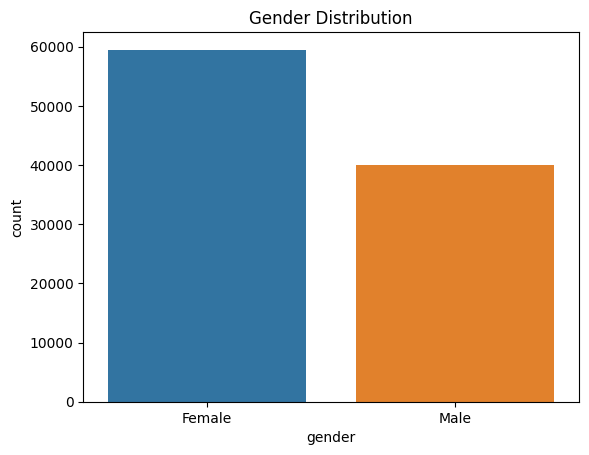

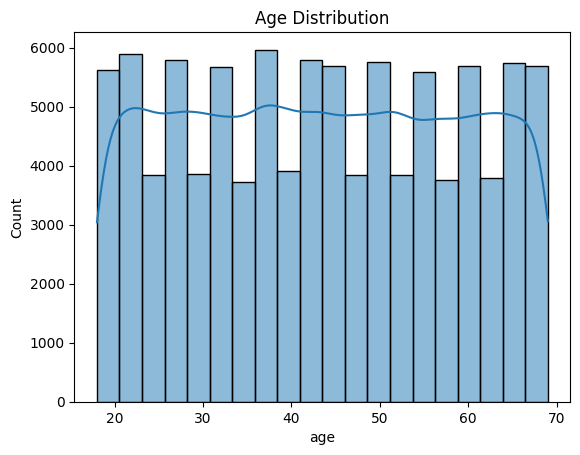

In [2]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

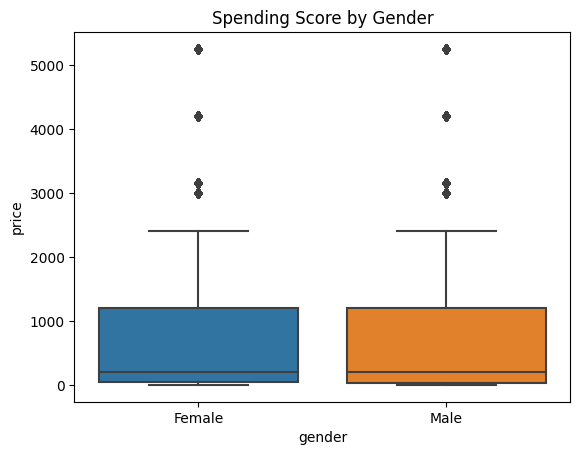

In [3]:
sns.boxplot(x='gender', y='price', data=df)
plt.title('Spending Score by Gender')
plt.show()

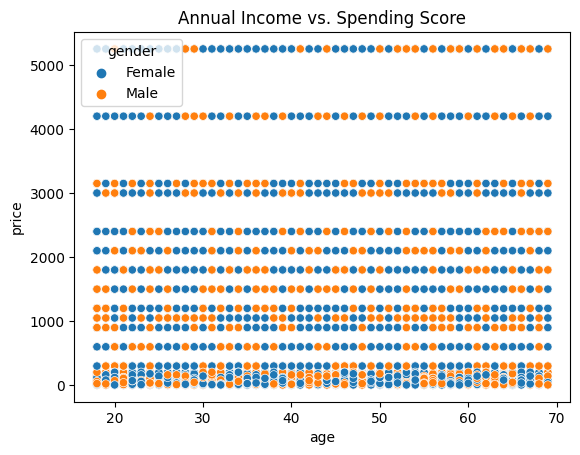

In [4]:
sns.scatterplot(x='age', y='price', hue='gender', data=df)
plt.title('Annual Income vs. Spending Score')
plt.show()

In [5]:
print(df.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


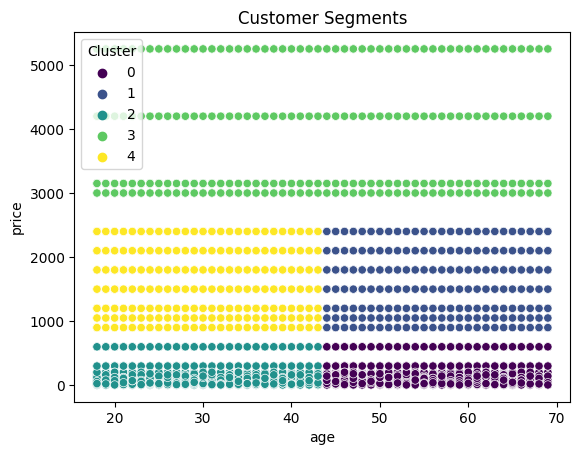

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clustering_features = df[['age', 'price']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42) 
df['Cluster'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x='age', y='price', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()